## Demagnetising potential around a uniform prism source

We want to derive the (magnetic scalar) potential around a uniformly magnetised prism. Two good references, that get us much of the way, are the following papers containing the demagnetising _field_ around a uniform prism, and the _gravitational_ potential around a uniform prism mass.

### Field around a uniformly magnetised prism

The first appendix in [Smith _et al._](https://backend.orbit.dtu.dk/ws/portalfiles/portal/5090369/Smith.pdf) republishes in modern notation the formulae from [Joseph & Schlömann (1965)](https://sci-hub.yncjkj.com/10.1063/1.1703091), who are using material from an undigitised paper of Rhodes & Rowlands (1954; _Proc. Leeds Phil. Lit. Soc. Sci._ Sec. **6**, 191). Here the field (a vector, unlike the scalar potential) is a rotation and scaling of the magnetisation vector, facilitated by the 3x3 demagnetisation tensor:

<!-- <center><img src="assets/demag-tensor-eq.png" width=30% /></center> -->
![](assets/demag-tensor-eq.png)

Note how, by the conventions of definite integration, $\mathbb{N}$ for a prism with domain $[-a, a]\times[-b,b]\times[-c,c]$ must contain the signed sum of the indefinte integral evaluated at the $2^3$ different combinations of $(\pm a, \pm b, \pm c)$. Geometrically, this corresponds to starting with the region $(-\infty, a] \times (-\infty, b] \times (-\infty, c]$, then substracting off the three regions with one limit negated (i.e. $(-\infty, -a] \times (-\infty, b] \times (-\infty, c]$ and likewise for $b$ and $c$), adding back in the regions with _two_ limits negated, and finally subtracting off the final octant $(-\infty, -a] \times (-\infty, -b] \times (-\infty, -c]$, which has been added back in one too many times.

This is belaboured to clarify the following expression for $\mathbb{N}$. First the off-diagonal elements, evaluating as a position $\mathbf{r}=(x,y,z)$ and definite integration limit $\mathbf{d} = (a,b,c)$:

<!-- <center><img src="assets/demag-tensor-offdiag.png" width=50% /></center> -->
![](assets/demag-tensor-offdiag.png)

where $F_{xy} = (c - z) + |\mathbf{d}-\mathbf{r}|$, $F_{yz} = (a - x) + |\mathbf{d}-\mathbf{r}|$ and $F_{zx} = (b - y) + |\mathbf{d}-\mathbf{r}|$. So, note then how the eight $F_{ij}$ terms inside the $\ln[\cdot]$ correspond to the $2^3$ contributions: the terms with zero or two negated limits contribute positively (numerator), and the terms with one or three negated limits contribute negatively (denominator). Combining them inside one $\ln[\cdot]$ is numerically efficient compared to evaluating eight separate calls to $\ln$.

The diagonal terms, however, are:

<!-- <center><img src="assets/demag-tensor-diag.png" height="150px" />&nbsp;&nbsp;&nbsp;&nbsp;<img src="assets/demag-tensor-diag-components.png" height="150px" /></center> -->

![](assets/demag-tensor-diag.png)
![](assets/demag-tensor-diag-components.png)

**Here, I am not able to explain why the signs are all $+$. I think the terms with one or three negated arguments should have $-$ contributions from the definite integration.**

Nevertheless, we can take from this that for the magnetic _potential_ there should be: transcendental functions like $\ln$ and $\arctan$, and that there will ultimately need to be some matrix-vector or vector-vector multiplication with the magnetisation vector to yield the final output.

### Potential around a uniform prism mass

[Chappell _et al._](https://arxiv.org/pdf/1206.3857.pdf) derive the expression for the gravitational potential. Amusingly, they note that the gravitation field around a cube seems not to have been published until 1955; the similarity in date to the Rhodes & Rowlands magnetic formula is interesting. In any event, surely it was known (and thought uninteresting to publish) in the early 1800s, though it does require transcendental functions. Even stranger then that they need to derive the potential as late as 2012.

The expression they give looks familiar given the above, and their notation is pleasingly compact:

<!---<center><img src="assets/grav-potential.png" width=70% /></center>--->
![](assets/grav-potential.png)

Here $x = x' - X$, (_sim._ for $y$ and $z$) are already relative to the integrating coordinates, so that $r = |\mathbf{r}|$, $v=xyz$ is a convenience introduced to handle the cyclic permutation of coordinates, and $D_j$ are equivalent to the limits $\mathbf{d}$ we used above. Note that with the summations we will again have $2^3$ contributing terms from the definite integral limits.

I can't see precisely how taking $\nabla$ of this expression would give the $F_{ij}$ and $f_i$ expressions from above, but the correspondence is strong. More importantly, because the graviational mass is a scalar, this expression doesn't include the dot product with a magnetisation vector. **We'll need to work out how to include that by comparing terms with the demagnetising field formula.**

### Magnetic potential around a spherical dipole

Lastly, let's remind ourselves of the simple formula for the potential around a _spherical_ source. This will be the asymptotic limit of our formula as we move far away from the prism. The dipole field at $\mathbf{r}$ from a source with moment $\mathbf{m}$ and position $\mathbf{r}_0$ is computed via the scalar potential as $${\mu_0}\mathbf{H}_{\odot}(\mathbf{r}) = -\nabla \underbrace{\overbrace{\frac{1}{4\pi |\mathbf{r}-\mathbf{r_0}|^2}}^{\text{Surface of 3D ball}}\overbrace{\frac{\mathbf{m}\cdot(\mathbf{r}-\mathbf{r_0})}{|\mathbf{r}-\mathbf{r_0}|}}^{\text{dipole term}}}_{\text{scalar potential }\phi}$$. 

### Reasoning for a derivation of the demagnetising potential

Clearly our formula for the magnetic scalar potential will need to involve something like $\phi = (1 / 4\pi r^2)\mathbf{m}\cdot f(\mathbf{r})$. From the Smith _et al._ expression with the field tensor $\mathbb{N}\cdot\mathbf{m}$ we can see that it is the $N_{11}$, $N_{21}$ and $N_{31}$ column that is associated with the $m_x$ component, and so we would guess:

$$ \phi = -\frac{1}{4\pi\mu_0} 
\begin{bmatrix} 
    -\frac{x^2}{2}\arctan\frac{yz}{xr} + xy\ln(z+r) + xz\ln(y+r) \\
    xy\ln(z+r) - \frac{y^2}{2}\arctan\frac{zx}{yr} + yz\ln(x+r) \\ 
    xz\ln(y+r) + yz\ln(x+r) - \frac{z^2}{2}\arctan\frac{xy}{zr} \\
\end{bmatrix}
\cdot\mathbf{m}.$$

We can factorise the column vector and, moving $\mathbf{m}$ to the left to resemble the dipole formula: 

$$ \phi = \frac{1}{4\pi\mu_0} \mathbf{m}\cdot
\begin{bmatrix}
x & 0 & 0 \\
0 & y & 0 \\
0 & 0 & z \\
\end{bmatrix}
\begin{bmatrix}
-\frac{\arctan}{2}\frac{yz}{xr} & \ln(z+r) & \ln(y+r) \\
\cdot & -\frac{\arctan}{2}\frac{zx}{yr} & \ln(x+r) \\ 
\cdot & \cdot & -\frac{\arctan}{2}\frac{xy}{zr} \\
\end{bmatrix}
\begin{bmatrix}
x \\ y \\ z
\end{bmatrix}
,$$

so the potential is a scalar

$$ \phi \propto \underbrace{\mathbf{m}}_{1\times 3} \cdot \underbrace{\text{diag}(\mathbf{r})}_{3\times 3} \cdot \underbrace{\mathbb{P}}_{3\times 3}\cdot\underbrace{\mathbf{r}}_{3\times 1}.$$

This is the indefinite expression, i.e. there it will need to be evaluated eight times using the various integration limit combinations.  

## Implementation

Here follows the start of an implementation for the above.

In [95]:
import jax
import jax.numpy as jnp

In [96]:
@jax.jit
def _interior(m: jax.Array, r: jax.Array):
    d = jnp.linalg.norm(r)
    return m.dot(r) / d


@jax.jit
def _exterior(m: jax.Array, r: jax.Array):
    x, y, z, d = *r, jnp.linalg.norm(r)

    diag = (
        -jnp.arctan(jnp.array([y * z / (x * d), x * z / (y * d), x * y / (z * d)])) / 2
    )
    logs = jnp.log(jnp.array([z + d, x + d, y + d]))
    off_diag, corner = logs[:2], logs[2:]

    P = (
        jnp.diag(diag)
        + jnp.diag(off_diag, k=1)
        + jnp.diag(off_diag, k=-1)
        + jnp.diag(corner, k=2)
        + jnp.diag(corner, k=-2)
    )

    return m @ jnp.diag(r) @ P @ r


print(_exterior(jnp.array([1, 1, 1]), jnp.array([1, 1, 1])))

5.2449174


In [97]:
res = 32
lim = 3

m = jnp.array([1, 0, 0])

x, y, z = jnp.meshgrid(
    jnp.linspace(-lim, lim, res), jnp.linspace(-lim, lim, res), jnp.linspace(-0, 0, 1)
)
grid = jnp.stack([x, y, z], axis=-1).reshape(-1, 3)
interior = jax.vmap(_interior, in_axes=(None, 0))(m, grid).reshape(res, res, 1)
exterior = jax.vmap(_exterior, in_axes=(None, 0))(m, grid).reshape(res, res, 1)

A, B, C = 1, 1, 1  # Cube boundaries
mask = jnp.stack([x, y, z], axis=-1)
# Assign values based on prism boundaries
potential = jnp.where(
    (mask[..., 0] >= -A)
    & (mask[..., 0] <= A)
    & (mask[..., 1] >= -B)
    & (mask[..., 1] <= B)
    & (mask[..., 2] >= -C)
    & (mask[..., 2] <= C),
    interior,
    exterior,
)

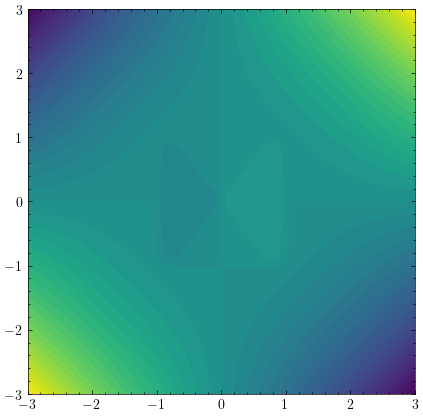

In [98]:
import matplotlib.pyplot as plt
import scienceplots  # noqa

plt.style.use(["science"])

plt.figure(figsize=(5, 5))
plt.contourf(x[..., 0], y[..., 0], potential[..., 0], levels=50, cmap="viridis")